In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Uncleaned_employees_final_dataset (1).csv')
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,64573,Technology,region_7,Bachelors,f,referred,2,30,5.0,6,1,0,81
17413,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17414,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51
17415,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,0,51


In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

In [ ]:
#checking for the null values
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [ ]:
df['education'].value_counts()

Bachelors          11519
Masters & above     4841
Below Secondary      286
Name: education, dtype: int64

In [ ]:
#fill the null values
df['previous_year_rating'].fillna(df['previous_year_rating'].mean(), inplace=True)
df[ 'education'].fillna('Below Secondary', inplace=True)

In [ ]:
#checking for the duplicated rows
df.duplicated().sum()

2

In [ ]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17417.000000,17417.000000,17417.000000,17417.000000,17417.000000,17417.000000,17417.000000,17417.000000
mean,39083.491129,1.250732,34.807774,3.345459,5.801860,0.358845,0.023368,63.176322
std,22707.024087,0.595692,7.694046,1.214862,4.175533,0.479675,0.151074,13.418179
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19281.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39122.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [ ]:
df.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
employee_id,1.000000,-0.005802,0.000876,-0.004306,0.010700,0.010275,-0.001305,-0.014572
no_of_trainings,-0.005802,1.000000,-0.085710,-0.049156,-0.061213,-0.045027,0.004436,0.045249
age,0.000876,-0.085710,1.000000,0.018004,0.641126,-0.025368,0.003716,-0.028045
previous_year_rating,-0.004306,-0.049156,0.018004,1.000000,0.007379,0.331026,0.034555,0.058147
length_of_service,0.010700,-0.061213,0.641126,0.007379,1.000000,-0.079599,-0.039263,-0.026420
KPIs_met_more_than_80,0.010275,-0.045027,-0.025368,0.331026,-0.079599,1.000000,0.105343,0.071947
awards_won,-0.001305,0.004436,0.003716,0.034555,-0.039263,0.105343,1.000000,0.077702
avg_training_score,-0.014572,0.045249,-0.028045,0.058147,-0.026420,0.071947,0.077702,1.000000


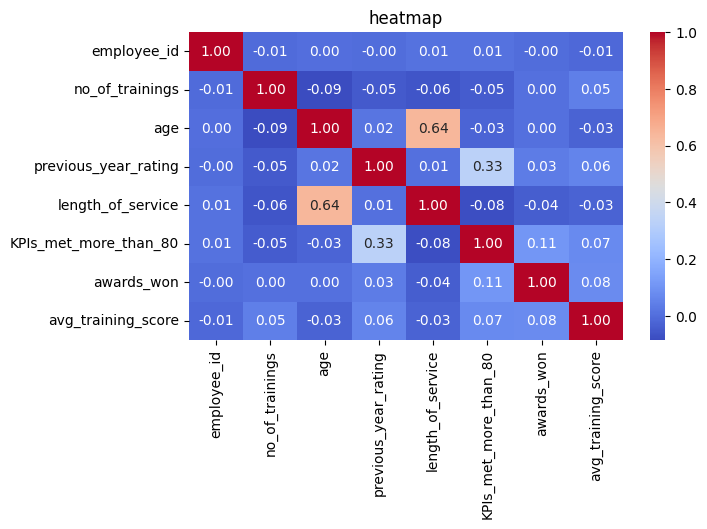

In [ ]:
#heatmap for finding the correlation

plt.figure(figsize=(7,4))
sns.heatmap(df.corr(),cmap='coolwarm',fmt='.2f',annot=True)
plt.title('heatmap')
plt.show()

In [ ]:
df['age'].max()

60

In [ ]:
df['length_of_service'].max()

34

<Axes: xlabel='length_of_service'>

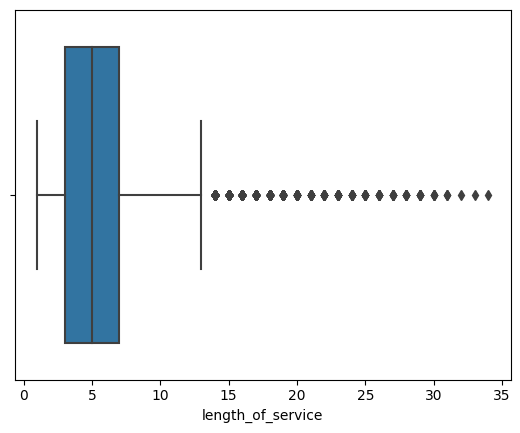

In [ ]:
sns.boxplot(x='length_of_service',data=df)

length of service is maximum outliers and with the median of 5.

<Axes: ylabel='Density'>

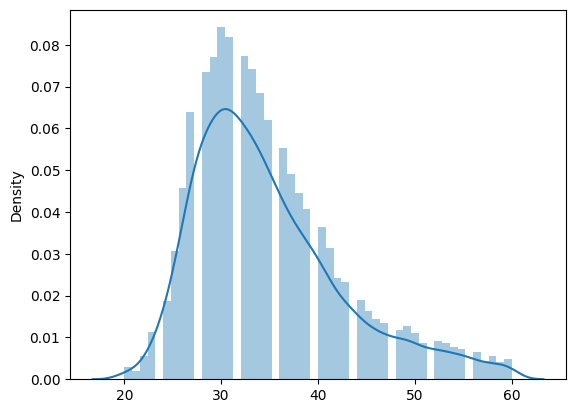

In [ ]:
sns.distplot(x=df['age'])

By the above plot we can tell that employee's performance are decreasing according to their age.

In [ ]:
emp_min=df[['employee_id','department','education','length_of_service']].min()
emp_min

employee_id                  3
department           Analytics
education            Bachelors
length_of_service            1
dtype: object

In [ ]:
emp_max=df[['employee_id','department','education','length_of_service']].max()
emp_max

employee_id                    78295
department                Technology
education            Masters & above
length_of_service                 34
dtype: object

In [ ]:
df1=df[df['age']<=40][['employee_id','length_of_service','age','no_of_trainings', 'avg_training_score']]
df1

,employee_id,length_of_service,age,no_of_trainings,avg_training_score
0,8724,1,24,1,77
1,74430,5,31,1,51
2,72255,4,31,1,47
3,38562,9,31,3,65
4,64486,7,30,1,61
...,...,...,...,...,...
17412,64573,6,30,2,81
17413,49584,9,33,1,51
17414,49584,9,33,1,51
17415,49584,9,33,1,51


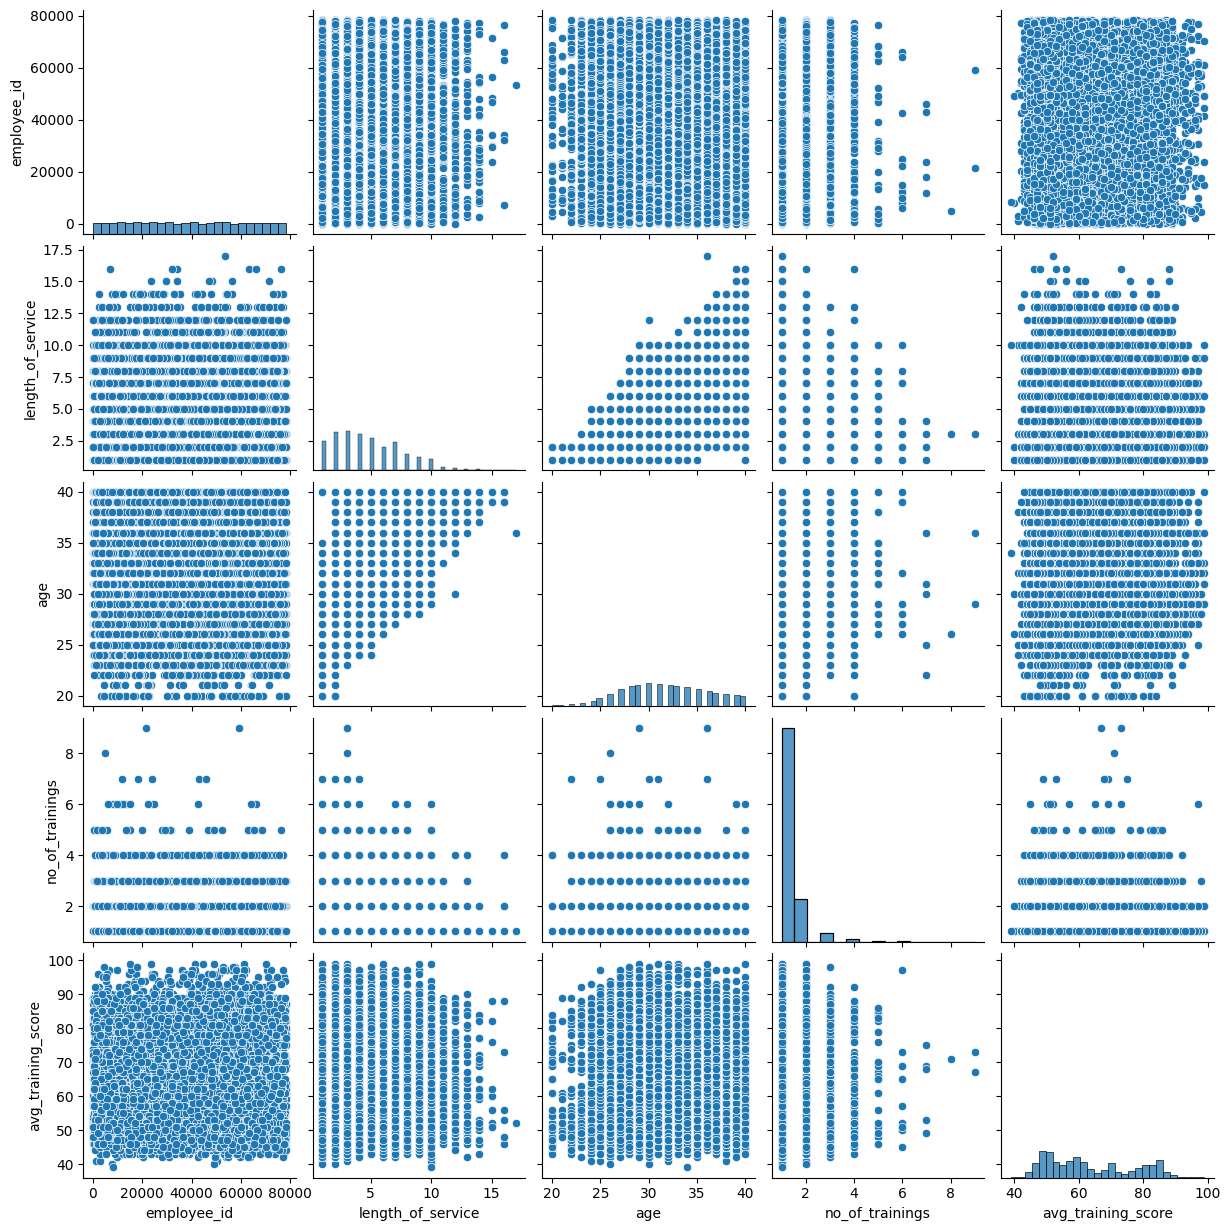

In [ ]:
#creating a pairplot to check the relation between the columns
sns.pairplot(data=df1)

In [ ]:
df['KPIs_met_more_than_80'].value_counts()

0    11167
1     6250
Name: KPIs_met_more_than_80, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'HR'),
  Text(2, 0, 'Sales & Marketing'),
  Text(3, 0, 'Procurement'),
  Text(4, 0, 'Finance'),
  Text(5, 0, 'Analytics'),
  Text(6, 0, 'Operations'),
  Text(7, 0, 'Legal'),
  Text(8, 0, 'R&D')])

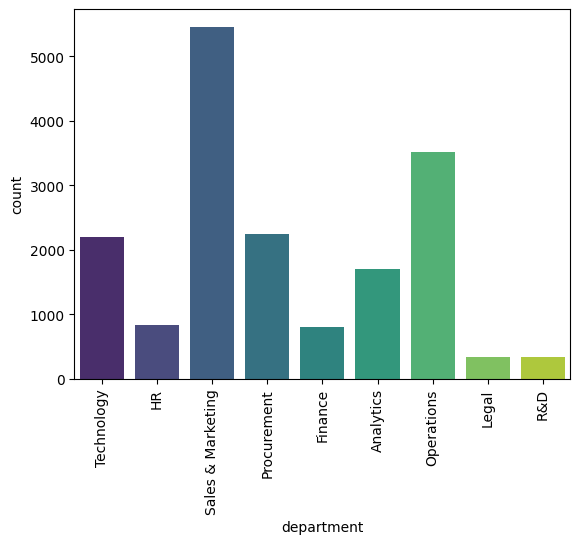

In [ ]:
sns.countplot(x='department',palette='viridis',data=df,orient='h')
plt.xticks(rotation=90)

'Sales & Marketing' dept are in high percentage compared with all departments, legal and R&D are in low.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'HR'),
  Text(2, 0, 'Sales & Marketing'),
  Text(3, 0, 'Procurement'),
  Text(4, 0, 'Finance'),
  Text(5, 0, 'Analytics'),
  Text(6, 0, 'Operations'),
  Text(7, 0, 'Legal'),
  Text(8, 0, 'R&D')])

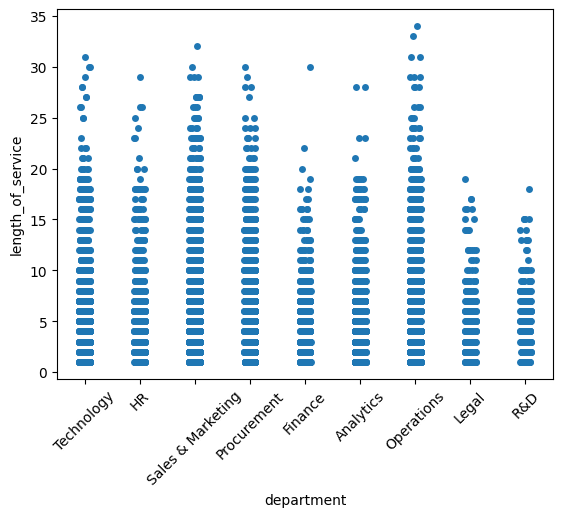

In [ ]:
sns.stripplot(x='department',y='length_of_service',data=df)
plt.xticks(rotation=45)

operations department is having the maximum length of service.

In [ ]:
dd=df[(df['department']=='Sales & Marketing')][['employee_id','department','education', 'length_of_service','recruitment_channel']]
dd

,employee_id,department,education,length_of_service,recruitment_channel
2,72255,Sales & Marketing,Bachelors,4,other
10,60245,Sales & Marketing,Bachelors,12,sourcing
11,42639,Sales & Marketing,Masters & above,10,sourcing
12,30963,Sales & Marketing,Masters & above,4,other
15,12737,Sales & Marketing,Bachelors,4,sourcing
...,...,...,...,...,...
17404,65455,Sales & Marketing,Bachelors,2,sourcing
17406,5996,Sales & Marketing,Masters & above,9,sourcing
17408,38568,Sales & Marketing,Bachelors,2,sourcing
17410,57239,Sales & Marketing,Bachelors,10,other


Text(0.5, 1.0, 'Analysis based on length of service')

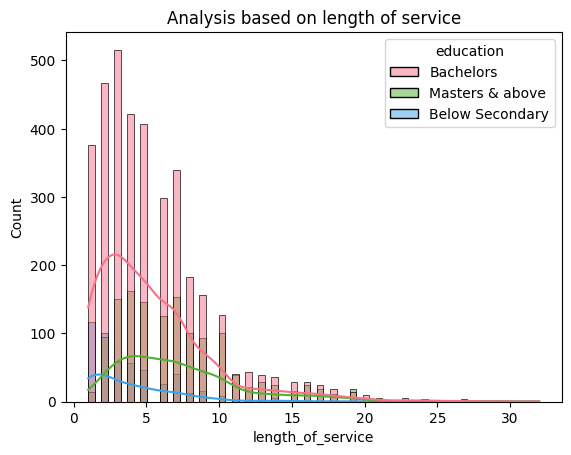

In [ ]:
sns.histplot(x=dd['length_of_service'],hue=dd['education'],kde=True,palette='husl')
plt.title('Analysis based on length of service')

*  from the above plot, we can tell that length of
service meets max at 3 for sales and marketing.
*  most of the employers had completed bachelors and least of the employers had did below secondary.



In [ ]:
top_EmpId=dd[(dd['recruitment_channel']=='other')][['employee_id','recruitment_channel']]
top_EmpId.head()
top_EmpId

,employee_id,recruitment_channel
2,72255,other
12,30963,other
36,36834,other
41,52061,other
45,49940,other


we can see that in sales and marketing employees are highly recruited for other.

In [ ]:
d=df.groupby('education').agg({})

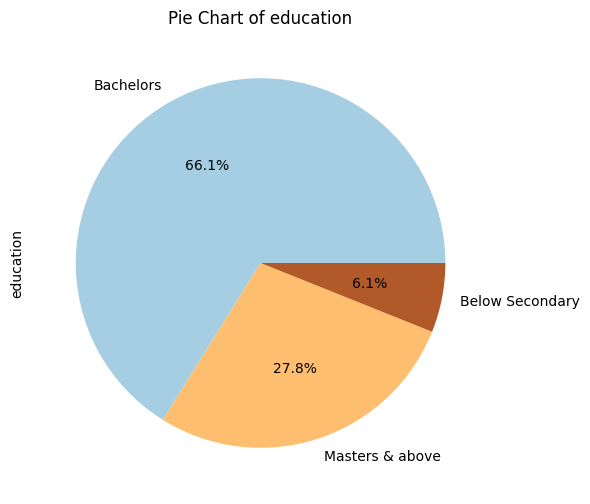

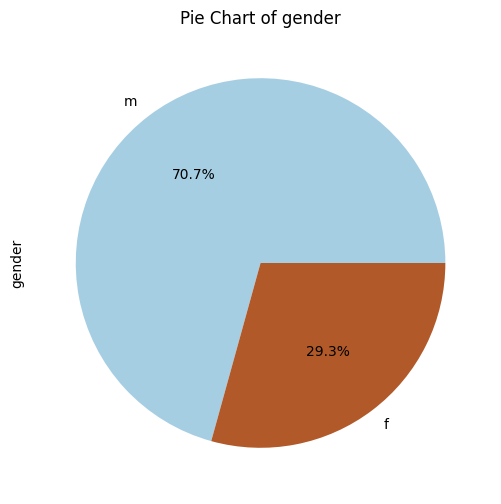

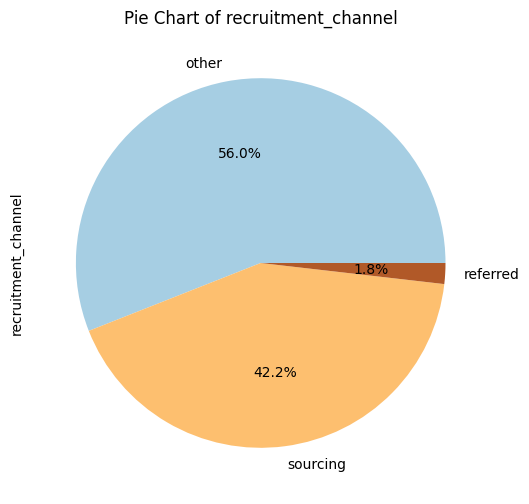

In [ ]:
categorical_columns=[ 'education', 'gender','recruitment_channel']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='Paired')
    plt.title(f'Pie Chart of {column}')
    plt.show()

operations department is having the maximum length of service.

# **Recommender systems**

In [ ]:
d1=pd.DataFrame(df.groupby('department')['avg_training_score'].mean())
d1

,avg_training_score
department,
Analytics,84.565115
Finance,60.326683
HR,50.387755
Legal,59.533133
Operations,60.351589
Procurement,70.180357
R&D,84.451807
Sales & Marketing,50.056614
Technology,79.847658


from the above table we can tell that analytics dept is having the high mean of training score

In [ ]:
d1['length_of_service']=pd.DataFrame(df.groupby('department')['avg_training_score'].count()).sort_values(by='avg_training_score',ascending=False)
d1

,avg_training_score,length_of_service
department,,
Analytics,84.565115,1697
Finance,60.326683,802
HR,50.387755,833
Legal,59.533133,332
Operations,60.351589,3524
Procurement,70.180357,2240
R&D,84.451807,332
Sales & Marketing,50.056614,5458
Technology,79.847658,2199


length of service is high for sales and marketing.

In [ ]:
df['avg_training_score'].value_counts()

# **Recommending the department**

In [ ]:
fd=df.pivot_table(index='employee_id',columns='department',values='avg_training_score')
fd.head(10)

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
employee_id,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,67.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,NaN
19,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN
20,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
d1.sort_values('avg_training_score',ascending=False).head(10)

,avg_training_score,length_of_service
department,,
Analytics,84.565115,1697
R&D,84.451807,332
Technology,79.847658,2199
Procurement,70.180357,2240
Operations,60.351589,3524
Finance,60.326683,802
Legal,59.533133,332
HR,50.387755,833
Sales & Marketing,50.056614,5458


In [ ]:
dept_ratings=fd[['Analytics',"R&D","Technology","Sales & Marketing",'HR','Legal','Finance','Operations','Procurement']]
dept_ratings.sample(20)

department,Analytics,R&D,Technology,Sales & Marketing,HR,Legal,Finance,Operations,Procurement
employee_id,,,,,,,,,
22674,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN
16602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN
75832,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN
29149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,NaN
19934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN
47317,NaN,NaN,84.0,NaN,NaN,NaN,NaN,NaN,NaN
77557,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53716,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,NaN
45581,NaN,NaN,NaN,47.0,NaN,NaN,NaN,NaN,NaN


Now we will use the corr() method to using a dataframe instead of pandas series.

In [ ]:
similar_to_analytics=fd.corrwith(dept_ratings)

In [ ]:
corr_analytics=pd.DataFrame(similar_to_analytics,columns=['Correlation'])
corr_analytics.dropna(inplace=True)
corr_analytics.head()

,Correlation
department,
Analytics,1.0
Finance,1.0
HR,1.0
Legal,1.0
Operations,1.0


sorting the departments based on correlation.

In [ ]:
corr_analytics.sort_values('Correlation',ascending=False)

,Correlation
department,
HR,1.0
Operations,1.0
Procurement,1.0
R&D,1.0
Analytics,1.0
Finance,1.0
Legal,1.0
Sales & Marketing,1.0
Technology,1.0


In [ ]:
df['length_of_service'].unique()

array([ 1,  5,  4,  9,  7,  2,  3, 11, 12, 10,  6, 14, 18,  8, 26, 13, 22,
       19, 21, 15, 16, 17, 23, 20, 31, 24, 27, 28, 25, 29, 33, 30, 34, 32])

Now, we will filter out the departments which are having maximum length of service.

In [ ]:
corr_analytics=corr_analytics.join(d1[['length_of_service','avg_training_score']])
corr_analytics

,Correlation,length_of_service,avg_training_score
department,,,
Analytics,1.0,1697,84.565115
Finance,1.0,802,60.326683
HR,1.0,833,50.387755
Legal,1.0,332,59.533133
Operations,1.0,3524,60.351589
Procurement,1.0,2240,70.180357
R&D,1.0,332,84.451807
Sales & Marketing,1.0,5458,50.056614
Technology,1.0,2199,79.847658


Now we will sort the values to make a little sense for the table.

In [ ]:
corr_analytics[corr_analytics['length_of_service']>=1000].sort_values('length_of_service',ascending=False)

,Correlation,length_of_service,avg_training_score
department,,,
Sales & Marketing,1.0,5458,50.056614
Operations,1.0,3524,60.351589
Procurement,1.0,2240,70.180357
Technology,1.0,2199,79.847658
Analytics,1.0,1697,84.565115


**conclusion:**


*   Length of service of employees is maximum upto 5 yrs.
*   Employees are working actively between the age of 30-40.

*   From the above recommendation analysis, we had found that sales and marketing is having high rate of employees andlow rate of employees working in legal and R&D.
*   so,I conclude that hr should concentrate on sales and marketing and operations department employers satisfying their requirements,as it will help in company growth.



